Following <https://scikit-learn.org/stable/modules/cross_validation.html>

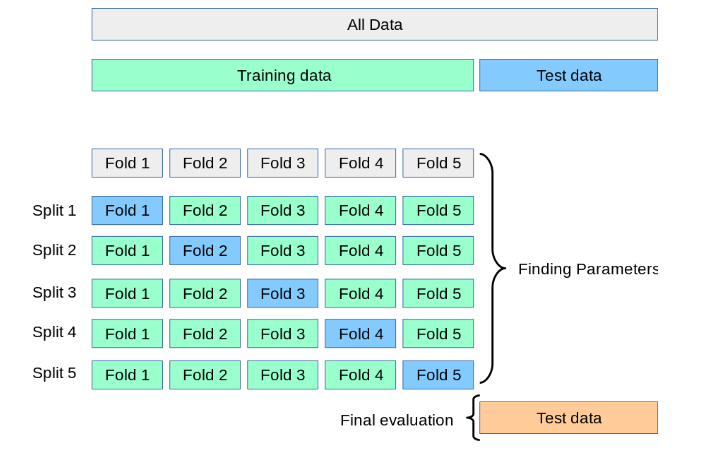

Data sets
- training data: data on which algorithm is being trained
- test data: data when decision about parameters readiness is being taken
- final test data: measure parameters performance

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GroupKFold, train_test_split
from sklearn import datasets
from sklearn import svm

In [3]:
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

## Simple split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_train.shape, y_train.shape

((90, 4), (90,))

## Cross validation

In [5]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [6]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


### KFold

In [7]:
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9]])
y = np.array([1, 1, 1, 2, 2, 2, 3, 3])
kf = KFold(n_splits=3)

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")


Fold 0:
  Train: index=[3 4 5 6 7]
  Test:  index=[0 1 2]
Fold 1:
  Train: index=[0 1 2 6 7]
  Test:  index=[3 4 5]
Fold 2:
  Train: index=[0 1 2 3 4 5]
  Test:  index=[6 7]


### StratifiedKFold

In [8]:
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9]])
y = np.array([1, 1, 1, 2, 2, 2, 3, 3])
kf = StratifiedKFold(n_splits=3)

# stratification is done based on y
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 2 4 5 7]
  Test:  index=[0 3 6]
Fold 1:
  Train: index=[0 2 3 5 6]
  Test:  index=[1 4 7]
Fold 2:
  Train: index=[0 1 3 4 6 7]
  Test:  index=[2 5]


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


#### Pandas

In [9]:
xY = pd.DataFrame(
    {
      "x1": np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype="int32"),
      "x2": np.array([2, 3, 4, 5, 6, 7, 8, 9], dtype="int32"),
      "y" : np.array([1, 1, 1, 2, 2, 2, 3, 3], dtype="int32")
    }
)
xY

,x1,x2,y
0,1,2,1
1,2,3,1
2,3,4,1
3,4,5,2
4,5,6,2
5,6,7,2
6,7,8,3
7,8,9,3


In [10]:
xY[["x1", "x2"]]

,x1,x2
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6
5,6,7
6,7,8
7,8,9


In [11]:
kf = StratifiedKFold(n_splits=3)

# stratification is done based on y
for i, (train_index, test_index) in enumerate(kf.split(xY[["x1", "x2"]], xY["y"])):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 2 4 5 7]
  Test:  index=[0 3 6]
Fold 1:
  Train: index=[0 2 3 5 6]
  Test:  index=[1 4 7]
Fold 2:
  Train: index=[0 1 3 4 6 7]
  Test:  index=[2 5]


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


#### train_test_split

In [12]:
train_set, test_set = train_test_split(xY, test_size=3, stratify=xY["y"])
test_set

,x1,x2,y
5,6,7,2
7,8,9,3
2,3,4,1


### GroupKFold

In [ ]:
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9]])
y = np.array([1, 1, 1, 2, 2, 2, 3, 3])
groups = np.array([1, 1, 1, 2, 2, 2, 3, 3])
kf = GroupKFold(n_splits=3)

for i, (train_index, test_index) in enumerate(kf.split(X, y, groups)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[0 1 2 6 7]
  Test:  index=[3 4 5]
Fold 1:
  Train: index=[3 4 5 6 7]
  Test:  index=[0 1 2]
Fold 2:
  Train: index=[0 1 2 3 4 5]
  Test:  index=[6 7]
